# Project: Portfolio - Final Project

In [47]:
# @title #### Student Identity
student_id = "Elistia Liza Namigo" # @param {type:"string"}
name = "REA6GDWBY" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1tb4BCIm0HtxjWWbnteWD2YNXAG2EY_ik?usp=sharing"  # @param {type:"string"}
assignment_id = "00_portfolio_project"

## Installation and Import `rggrader` Package

In [48]:
%pip install rggrader
from rggrader import submit_image
from rggrader import submit

## Working Space

## **Geothermal Anomaly Detection Using Remote Sensing and Unsupervised Machine Learning**

---
## Project Description :
Indonesia, located on the Pacific Ring of Fire, holds approximately 40% of the world’s geothermal potential. However, traditional exploration methods are expensive, time-consuming, and environmentally disruptive. To support more sustainable exploration strategies, this project leverages satellite-derived remote sensing data and unsupervised machine learning to identify potential geothermal anomalies in Solok, West Sumatra, near Mt. Talang.
This study applies:

    1.Normalized Difference Vegetation Index (NDVI) to detect vegetation stress
    2.Land Surface Temperature (LST) to identify thermal anomalies
    3.InSAR (VV band) to detect ground deformation

By integrating these parameters, we apply:

    a.KMeans Clustering to identify typical vs atypical spatial–temporal patterns
    b.Isolation Forest to flag statistical outliers.
    c.Joint filtering: overlap of both → high-priority anomalies

These approaches produce a spatially-informed anomaly detection model suitable for early-stage geothermal exploration. Isolation Forest and KMeans clustering can detect latent patterns and anomalies within high-dimensional satellite data ***without relying on labeled ground-truth observations, which are often SCARCE in remote geothermal zones***

# Unsupervised Anomaly Detection Pipeline for Geothermal Exploration
Here is a general Machine Learning Pipeline tailored for unsupervised geothermal anomaly detection using NDVI, LST, and InSAR (VV).

1. Data Collection & Integration
2. Data Cleaning & Preprocessing
3. Feature Engineering
4. Unsupervised Anomaly Detection Models
5. Joint Filtering of High-Priority Anomalies
6. Visualization
7. Evaluation & Validation
8. Export & Deployment
    


## 📥 1. Data Collection and Export

**Google Earth Engine (GEE)** is used to collect and process monthly composite data from multiple satellite sources for a 10×10 km area surrounding **Mount Talang, Solok** in West Sumatera, a region known for geothermal activity.


### 🛰️ Data Sources:

| Feature | Source       | Description |
|---------|--------------|-------------|
| **NDVI** | Landsat 8    | Monthly NDVI to capture vegetation stress |
| **LST**  | Landsat 8 (Band 10) | Land Surface Temperature (thermal indicator) |
| **VV**   | Sentinel-1 SAR | Vertical backscatter (proxy for deformation) |

---

### 🌐 Study Area and Grid:
- Region: Mt. Talang, Solok, West Sumatra  
- Area: 10 × 10 km  
- Resolution: ~500m grid spacing (~0.005°)
- Temporal Scope: Monthly composites

---

### 📄 Export Format from GEE:
| Column        | Description                                  |
|---------------|----------------------------------------------|
| `system:index`| Unique ID for grid location and month        |
| `NDVI`        | Normalized Difference Vegetation Index       |
| `LST`         | Land Surface Temperature (scaled from GEE raw) |
| `VV`          | Sentinel-1 backscatter (Vertical) in dB      |
| `.geo`        | GeoJSON string with point coordinates         |

---

### 📦 Result:
- Total Points: **42,495**
- Format: CSV exported from GEE composite
The result is exported in [.csv format](https://drive.google.com/file/d/16nMQLdlwnRrm1dskDif5GGLZqzMWAMRj/view?usp=sharing) (click the link to download)
- Next step: Parse `.geo` field to extract `lat` and `lon` for spatial ML mapping

## 🧮 2. Feature Extraction and Coordinate Parsing

Before we can apply ML models or spatial visualization, we need to extract usable features and spatial coordinates from the raw data:

---

### 📌 Key Tasks:
- Parse the `.geo` column (GeoJSON strings) to extract `latitude` and `longitude` for each point.
- Verify that the features (`NDVI`, `LST`, `VV`) are already numerical and ready for analysis.
- Optionally, inspect distribution, missing values, and ranges.

---
## 🧹 3. Data Cleaning – Filter Implausible Physical Values

Before applying machine learning models, we manually removed **physically unrealistic or extreme values** from the raw satellite-derived data. This is critical to ensure the **validity and stability** of downstream clustering and anomaly detection models.

---

### ✂️ Applied Filters:

| Feature | Expected Range | Description |
|--------|----------------|-------------|
| **LST** (°C) | `-20 to 60` | Land Surface Temperature values below -20°C or above 60°C are considered non-Earth-like or cloud-contaminated. |
| **NDVI** | `0 to 1` | NDVI values outside [0, 1] are excluded. NDVI is dimensionless and expected in this range for vegetation. |
| **VV** (dB) | `-20 to +5` | Sentinel-1 vertical polarization (VV) backscatter in dB. Most surface types fall in this typical SAR range. |

---

### ✅ Result:
- Points with invalid or extreme values are removed.
- Remaining data is physically meaningful and ready for ML modeling and spatial interpretation.


### 🧭 Output:
- A cleaned DataFrame with the following structure:
  | lat | lon | NDVI | LST | VV |
- This will enable us to:
  - Visualize results on a real-world map using `folium`
  - Apply unsupervised learning using these spatial features




In [10]:
!pip install -q gdown

Downloading...
From: https://drive.google.com/uc?id=16nMQLdlwnRrm1dskDif5GGLZqzMWAMRj
To: /content/Solok_Remote_Sensing.csv
100%|██████████| 6.63M/6.63M [00:00<00:00, 38.5MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42495 entries, 0 to 42494
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  42495 non-null  object 
 1   LST           42495 non-null  float64
 2   NDVI          42495 non-null  float64
 3   VV            42495 non-null  float64
 4   .geo          42495 non-null  object 
dtypes: float64(3), object(2)
memory usage: 1.6+ MB
----------------- Checking Structure -------------------
Remaining rows: 29767
Columns: ['system:index', 'LST', 'NDVI', 'VV', 'lon', 'lat']
Preview:
     system:index        LST      NDVI         VV         lon       lat
37         0_43_0 -15.727842  0.587288  -8.272573  100.589528 -0.579279
1060     0_1373_0 -15.621029  0.297405  -9.982251  100.588989 -0.581704
1540        1_1_0 -10.210303  0.180247  -6.767043  100.999698 -1.259213
1541        1_5_0  -7.451961  0.408135 -11.513838  101.013712 -1.105332
1542        1_7_0   2.533784  

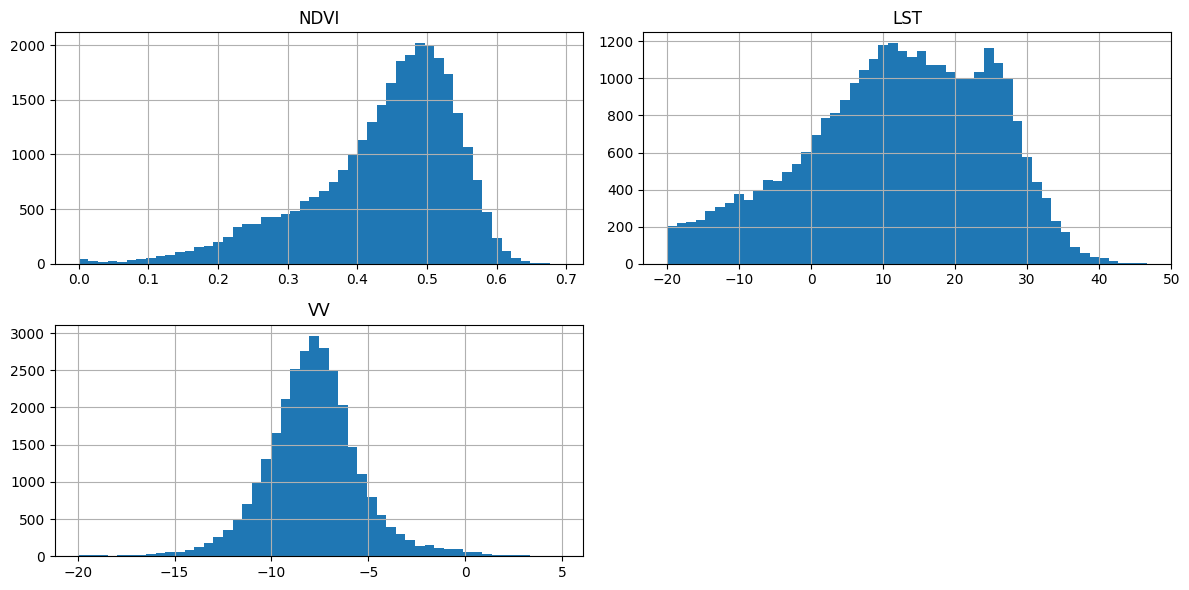

---------------- Checking for Remaining Outliers --------------------
Min/Max LST after cleaning: -19.999512579999973 / 46.677512570000005
Remaining data points: 29767


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:

# File ID extracting from link
# Link: https://drive.google.com/file/d/16nMQLdlwnRrm1dskDif5GGLZqzMWAMRj/view?usp=sharing
file_id = "16nMQLdlwnRrm1dskDif5GGLZqzMWAMRj"
output_path = "Solok_Remote_Sensing.csv"

# Download file
import gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)

# Load with pandas
import pandas as pd
df = pd.read_csv(output_path)

# Display preview
df.info()
df.head()

import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast

# ✅ Parse geometry and extract lat/lon if '.geo' column exists
if '.geo' in df.columns:
    df[['lon', 'lat']] = df['.geo'].apply(lambda g: json.loads(g)['coordinates']).apply(pd.Series)
    df = df.drop(columns=['.geo'])

# ✅ Drop rows with any missing values
df = df.dropna()

# ✅ Filter out implausible physical values
df = df[(df['LST'] >= -20) & (df['LST'] <= 60)]       # LST in °C
df = df[(df['NDVI'] >= 0) & (df['NDVI'] <= 1)]        # NDVI dimensionless (0–1)
df = df[(df['VV'] >= -20) & (df['VV'] <= 5)]          # VV in dB

# ✅ Check structure
print ("----------------- Checking Structure -------------------")
print("Remaining rows:", len(df))
print("Columns:", df.columns.tolist())
print("Preview:")
print(df.head())

# ✅ Feature scaling for modeling
features = df[['NDVI', 'LST', 'VV']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# ✅ Check Summary Statistics
print ("---------------- Checking Summary Statistics --------------------")
print(df.describe())

# ✅ Visualize Distributions (Histograms)
print ("---------------- Distribution Visualization --------------------")
df[['NDVI', 'LST', 'VV']].hist(bins=50, figsize=(12, 6))
plt.tight_layout()
plt.show()

# ✅Checking for the remaining outliers
print ("---------------- Checking for Remaining Outliers --------------------")
print("Min/Max LST after cleaning:", df['LST'].min(), "/", df['LST'].max())
print("Remaining data points:", len(df))

# ✅ Save cleaned unscaled data
df.to_csv("Solok_RemoteSensing_Cleaned.csv", index=False)

# ✅ Optional: download directly to your computer
#from google.colab import files
#files.download("Solok_RemoteSensing_Cleaned.csv")

## ⚙️ 4. Feature Scaling and KMeans Clustering

To ensure fair contribution from each feature during clustering, we applied **standardization** using `StandardScaler`. This transformation rescales the input variables to have:
- **Mean = 0**
- **Standard Deviation = 1**

This is essential because NDVI, LST, and VV have different units and ranges.

---

### 🧠 KMeans Clustering

We applied **KMeans**—a popular unsupervised learning algorithm that:
- Groups data into `K` distinct clusters based on similarity.
- Minimizes intra-cluster distance (compactness).
- Assigns each point to the nearest cluster centroid.

In this study, we used:
- **K = 3 clusters** (initial assumption based on visual data inspection)
- Distance to cluster center was used as a **proxy anomaly score**

---

### 🔍 Anomaly Score (Distance to Cluster Centroid)

To quantify how "unusual" each point is within its cluster, we calculated the **Euclidean distance** between the point and its assigned cluster centroid. This value is stored as the **anomaly score**.

- Points **farther from the centroid** are more likely to be **outliers**.
- This score allows for **ranking**, **filtering**, and **visualizing** anomalies beyond simple cluster assignment.
- It complements cluster analysis by identifying **subtle or extreme deviations**.

---

### 📌 Output:
- Each point is labeled with a cluster ID (e.g., 0, 1, 2)
- Each point has an associated **anomaly score**
- Points with high anomaly scores are flagged as **high-priority geothermal anomaly candidates**


In [31]:
# ----- Standardize the Feature Columns (NDVI, LST, VV) -----
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select relevant features
features = df[['NDVI', 'LST', 'VV']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# ----- Run KMeans Clustering -------
from sklearn.cluster import KMeans

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Assign results back to dataframe
df['cluster'] = clusters

# Compute anomaly score: Distance from each point to its cluster centroid
df['anomaly_score'] = np.linalg.norm(scaled_features - kmeans.cluster_centers_[clusters], axis=1)

# Optionally rename for clarity
df['cluster_distance'] = df['anomaly_score']

# Sort top 10 farthest points as "most anomalous"
anomalies = df.sort_values(by='anomaly_score', ascending=False).head(10)

# Display anomalies
anomalies[['NDVI', 'LST', 'VV', 'lat', 'lon', 'cluster', 'anomaly_score']]



,NDVI,LST,VV,lat,lon,cluster,anomaly_score
29248,0.081650,3.678821,4.667771,-0.871411,100.700829,0,5.794033
17997,0.234312,-3.912601,4.862041,-1.277539,101.001315,1,5.594797
21093,0.200457,-3.123039,4.287334,-1.032299,100.994309,0,5.490211
42024,0.021102,-9.109701,-19.826447,-1.005350,100.737750,0,5.328082
10234,0.001224,-15.626156,-18.610841,-1.064369,100.733438,0,5.248950
7677,0.017477,-10.514507,-19.340205,-1.083503,100.763621,0,5.229054
16420,0.150501,9.687700,3.639780,-0.871411,100.700829,0,5.165181
3236,0.011426,5.762104,-19.943946,-1.001846,100.736941,0,5.125716
9496,0.008518,6.929358,-19.913666,-1.081347,100.742331,0,5.117482
7853,0.044175,-16.130314,-18.644191,-1.081347,100.742331,0,5.084708


## 📊5. Visualization

In this step, we visualize the results of our anomaly detection and clustering analysis to better understand spatial and multivariate patterns in the remote sensing data.

### 🎯 Objectives:
- Interpret the **multivariate relationships** between NDVI, LST, and InSAR (VV).
- Identify **high-priority anomaly zones** based on KMeans clustering and anomaly scores.
- Support **decision-making** for geothermal exploration using clear visual tools.

---

### 🧪 1. KMeans Clustering (3D Visualization)

We create a 3D scatter plot of NDVI, LST, and InSAR values, with each point colored by its assigned cluster label. This allows us to observe natural groupings in the data and hypothesize which cluster may represent geothermal anomalies.

- **Axes**: NDVI, LST (°C), and InSAR VV (mm)
- **Color**: Cluster ID (0, 1, 2)
- **Interpretation**: Cluster with **low NDVI**, **moderate to high LST**, and **strong InSAR shift** is a strong geothermal candidate.

---

### 📌 2. Anomaly Score (Distance to Cluster Centroid)

We calculate an anomaly score for each point based on its **Euclidean distance** from its cluster center in the standardized feature space. A 3D scatter plot is used again, this time colored by anomaly score.

- **Color scale**: From low (normal) to high (anomalous)
- **Benefit**: Helps prioritize which locations are most **unusual** in the context of their environment.

---

### 🗺️ 3. Geographic Overlay (2D Map)

We overlay both **clustered anomalies** and **anomaly scores** on a 2D geographic map (latitude and longitude). Heatmaps and point markers are used to show spatial concentrations of geothermal indicators.

- **Basemap**: Folium with OpenStreetMap / Stamen Terrain
- **Overlays**: Known geothermal sites, hot springs, fumaroles
- **Insight**: Correlate remote sensing anomalies with **real-world geothermal manifestations**

---

### ✅ Summary

Visualizations provide an **intuitive and evidence-based view** of potential geothermal anomalies. They are essential for:

- **Validating model performance**
- **Communicating findings**
- **Prioritizing future field surveys**




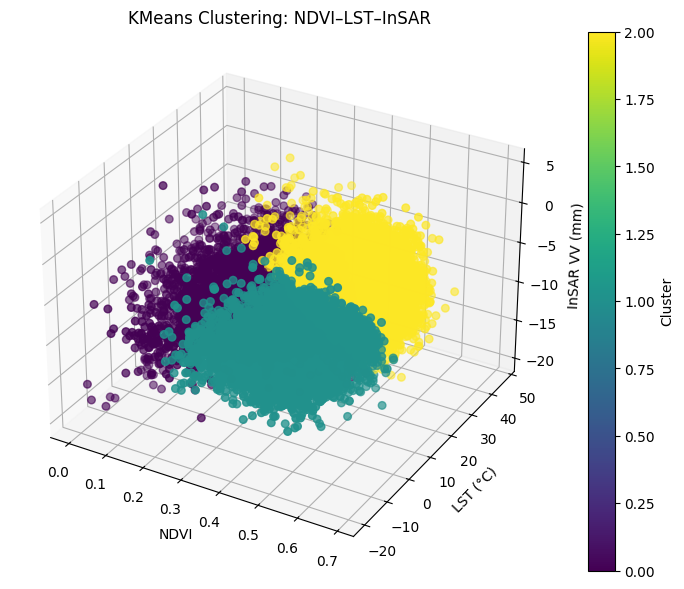

<br><br><hr><br>

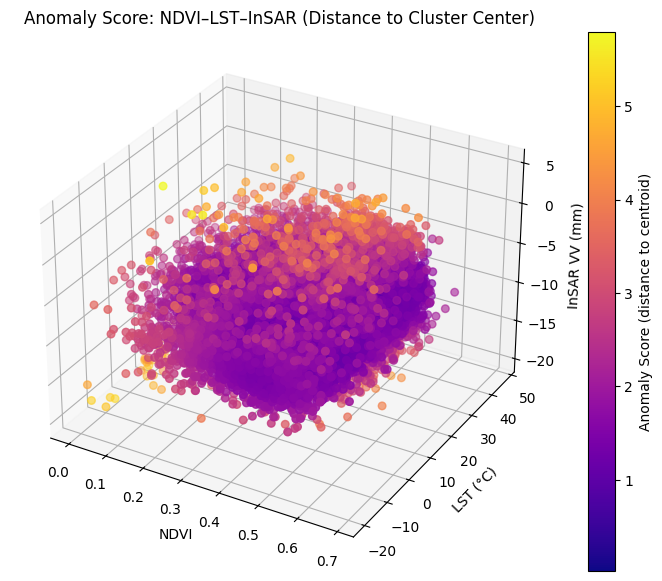

---------------- Group by cluster and describe key indicators -------------------------
             NDVI        LST        VV
cluster                               
2        0.485703  20.613280 -7.160132
0        0.284928  14.811353 -8.914127
1        0.472786  -1.395935 -8.035957
---------------- Anomaly score analysis using anomaly score -------------------------


,mean,max,std
cluster,,,
0,1.381221,5.794033,0.698196
2,1.134353,4.871692,0.614688
1,1.100095,5.594797,0.509490


In [36]:
# ----------- Create 3D Scatter Plot (Colored by Cluster) ------------------
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create first figure
plt.figure(figsize=(10, 7))
ax1 = plt.axes(projection='3d')

scatter1 = ax1.scatter(df['NDVI'], df['LST'], df['VV'],
                       c=df['cluster'], cmap='viridis', s=30)

ax1.set_xlabel('NDVI')
ax1.set_ylabel('LST (°C)')
ax1.set_zlabel('InSAR VV (mm)')
ax1.set_title('KMeans Clustering: NDVI–LST–InSAR')

plt.colorbar(scatter1, label='Cluster')
plt.show()

# Add visual space between plots
from IPython.display import display, Markdown
display(Markdown('<br><br><hr><br>'))  # Line break and horizontal rule

# ----------- 3D Scatter Plot Colored by Anomaly Score ------------------

# Create second figure
plt.figure(figsize=(10, 7))
ax2 = plt.axes(projection='3d')

# Use anomaly_score as color gradient
scatter2 = ax2.scatter(df['NDVI'], df['LST'], df['VV'],
                       c=df['anomaly_score'], cmap='plasma', s=30)

ax2.set_xlabel('NDVI')
ax2.set_ylabel('LST (°C)')
ax2.set_zlabel('InSAR VV (mm)')
ax2.set_title('Anomaly Score: NDVI–LST–InSAR (Distance to Cluster Center)')

plt.colorbar(scatter2, label='Anomaly Score (distance to centroid)')
plt.show()

# ----------- Group by cluster and describe key indicators -------------------------
print ("---------------- Group by cluster and describe key indicators -------------------------")
summary = df.groupby('cluster')[['NDVI', 'LST', 'VV']].mean().sort_values(by='LST', ascending=False)
print (summary)

# ----------- Anomaly score analysis -------------------------
print ("---------------- Anomaly score analysis using anomaly score -------------------------")
summary_anomaly = df.groupby('cluster')['anomaly_score'].agg(['mean', 'max', 'std']).sort_values(by='mean', ascending=False)
summary_anomaly




From result above we can see that cluster 0 is the best for geothermal anomaly candidate.

*   Lowest NDVI (0.285) → sparse vegetation
*   Moderate LST (14.81 °C)
*   Strongest InSAR shift (-8.91 mm)

These result indicates low vegetation, strong ground movement, and elevated temperature. **This is the best geothermal anomaly candidate.**. This is also confirmed by anomaly score analysis (cluster 0 has high average & highest peak, likely to contain geothermal related outliers)


Next step is to map this Cluster 0 anomalies and overlay it to geographical map.

In [33]:

#-------- Mapping with highlight only the best candidate cluster (Cluster 0) ---------------

# 1. Filter Cluster 0
cluster_0 = df[df['cluster'] == 0]

# 2. Center map on the Cluster 0 region
map_center = [cluster_0['lat'].mean(), cluster_0['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=11, tiles="OpenStreetMap")

# 3. Add red markers for Cluster 0
for _, row in cluster_0.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=1,
        color='red',
        fill=True,
        fill_opacity=0.9,
        tooltip=f"NDVI: {row['NDVI']:.2f}, LST: {row['LST']:.2f}, VV: {row['VV']:.2f}"
    ).add_to(m)
m.save("Geothermal_KMeans_Clusters_Map.html")
# 4. Show the map
m


Output hidden; open in https://colab.research.google.com to view.

In [34]:
#------------ Adding heatmap overlay and known geothermal manifestations ---------------------------
from folium.plugins import HeatMap

# Center the map on Solok
m = folium.Map(location=[-1.0, 100.95], zoom_start=9)

# Filter Cluster 0 (geothermal candidate)
cluster_0 = df[df['cluster'] == 0]

# Center map on Cluster 0
map_center = [cluster_0['lat'].mean(), cluster_0['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=11, tiles="OpenStreetMap")

# Add red circle markers
for _, row in cluster_0.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=1,
        color='red',
        fill=True,
        fill_opacity=0.9,
        tooltip=f"NDVI: {row['NDVI']:.2f}, LST: {row['LST']:.2f}, VV: {row['VV']:.2f}"
    ).add_to(m)

# Prepare heatmap data (with optional weight by anomaly score)
# You can switch to 'cluster_distance' if you prefer anomaly intensity
heat_data = [[row['lat'], row['lon']] for _, row in cluster_0.iterrows()]

# Add heatmap layer
HeatMap(heat_data, radius=15, blur=10, min_opacity=0.3).add_to(m)

# List of known geothermal manifestations
manifestations = [
    {"name": "Muara Laboh Geothermal", "lat": -1.316, "lon": 100.710, "color": "blue", "icon": "industry"},
    {"name": "Padang Ganting Hot Spring 1", "lat": -0.568, "lon": 100.712, "color": "green", "icon": "tint"},
    {"name": "Padang Ganting Hot Spring 2", "lat": -0.524, "lon": 100.757, "color": "green", "icon": "tint"},
    {"name": "Alahan Panjang Hot Spring", "lat": -1.035, "lon": 100.698, "color": "green", "icon": "tint"},
    {"name": "Lembah Gumanti Hot Spring", "lat": -1.105, "lon": 100.682, "color": "green", "icon": "tint"},
    {"name": "Gunung Talang Fumarole", "lat": -1.114, "lon": 100.679, "color": "orange", "icon": "fire"}
]

# Add markers to the map
for site in manifestations:
    folium.Marker(
        location=[site["lat"], site["lon"]],
        popup=site["name"],
        icon=folium.Icon(color=site["color"], icon=site["icon"], prefix='fa')
    ).add_to(m)

# Show the map
m


Output hidden; open in https://colab.research.google.com to view.

## 🔀 5. Joint Filtering of High-Priority Anomalies

To improve the **reliability** of our anomaly detection, we applied a **joint filtering strategy** that combines results from:

- **KMeans Anomaly Score** (distance to cluster center)
- **Isolation Forest Outlier Flags** (tree-based anomaly detection)

This dual-layer filtering approach ensures that selected anomalies are:
- **Statistically rare** in the feature distribution (**Isolation Forest**)
- **Unusual within their own cluster** (**KMeans distance metric**)

---

### 🎯 Why Use Joint Filtering?

Single-method anomaly detection may produce:
- **False positives** (e.g., a point far from its cluster center but still within natural variation)
- **False negatives** (e.g., a point statistically anomalous but within a dense cluster)

By combining both methods, we increase confidence in the detected anomalies.

---

### 🧠 How It Works

We define a **high-priority anomaly** as a data point that satisfies:

- `kmeans_anomaly_score` above a certain threshold (e.g., **95th percentile**)
- AND is flagged as an outlier by **Isolation Forest**

This ensures only the most **extreme and structurally unusual** points are retained for further analysis.

---

### 📌 Output:

- A new filtered dataframe: `high_priority_anomalies`, **where both KMeans and Isolation Forest models agree there is an anomaly**
- Contains locations with the **highest geothermal potential**
- Ready for **visualization**, **mapping**, or **export** for further study


In [39]:
# 1. Install necessary packages
!pip install -q folium gdown

# 2. Import libraries
import gdown
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# 3. Download dataset from Google Drive
file_id = "1MGbNvgZ_LOkHrZla-OX7NKKTS4VBUBFv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Solok_RemoteSensing_Cleaned.csv", quiet=False)

# 4. Load the dataset
df = pd.read_csv("Solok_RemoteSensing_Cleaned.csv")

# 5. Check for lat/lon
assert 'lat' in df.columns and 'lon' in df.columns, "CSV must contain 'lat' and 'lon' columns."

# 6. Standardize features
features = ['NDVI', 'LST', 'VV']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# 7. KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# 8. Isolation Forest anomaly detection
iso = IsolationForest(contamination=0.01, random_state=42)
df['is_anomaly'] = iso.fit_predict(df_scaled) == -1

# 9. Create a folium map
map_center = [df['lat'].mean(), df['lon'].mean()]
m = folium.Map(location=map_center, zoom_start=10, tiles='OpenStreetMap')

# 10. Overlay anomaly points
for _, row in df.iterrows():
    if row['cluster'] == 0 and row['is_anomaly']:
        color = 'black'  # Both models agree
    elif row['cluster'] == 0:
        color = 'red'    # KMeans only
    elif row['is_anomaly']:
        color = 'blue'   # iForest only
    else:
        continue
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        color=color,
        fill=True,
        fill_opacity=0.8,
        stroke=False
    ).add_to(m)

# 11. Add heatmap (all data)
heat_data = [[row['lat'], row['lon']] for _, row in df.iterrows()]
HeatMap(heat_data, radius=10, blur=15, min_opacity=0.4).add_to(m)

# 12. Add known geothermal sites
manifestations = [
    {"name": "Muara Laboh Geothermal", "lat": -1.316, "lon": 100.710, "color": "blue", "icon": "industry"},
    {"name": "Padang Ganting Hot Spring 1", "lat": -0.568, "lon": 100.712, "color": "green", "icon": "tint"},
    {"name": "Padang Ganting Hot Spring 2", "lat": -0.524, "lon": 100.757, "color": "green", "icon": "tint"},
    {"name": "Alahan Panjang Hot Spring", "lat": -1.035, "lon": 100.698, "color": "green", "icon": "tint"},
    {"name": "Lembah Gumanti Hot Spring", "lat": -1.105, "lon": 100.682, "color": "green", "icon": "tint"},
    {"name": "Gunung Talang Fumarole", "lat": -1.114, "lon": 100.679, "color": "orange", "icon": "fire"}
]
for site in manifestations:
    folium.Marker(
        location=[site["lat"], site["lon"]],
        popup=site["name"],
        icon=folium.Icon(color=site["color"], icon=site["icon"], prefix='fa')
    ).add_to(m)

# 13. Add volcano locations
volcanoes = [
    {"name": "Mount Talang", "lat": -0.979237, "lon": 100.681706, "color": "orange", "icon": "fire"},
    {"name": "Mount Kerinci", "lat": -1.697, "lon": 101.282, "color": "red", "icon": "fire"},
    {"name": "Mount Marapi", "lat": -0.319, "lon": 100.384, "color": "darkred", "icon": "fire"},
    {"name": "Mount Tandikat", "lat": -0.324, "lon": 100.479, "color": "brown", "icon": "fire"},
    {"name": "Mount Singgalang", "lat": -0.310, "lon": 100.473, "color": "purple", "icon": "fire"}
]
for v in volcanoes:
    folium.Marker(
        location=[v["lat"], v["lon"]],
        popup=v["name"],
        icon=folium.Icon(color=v["color"], icon=v["icon"], prefix='fa')
    ).add_to(m)

# 14. Save and display the map
m.save("Geothermal_Anomaly_Heatmap_With_Markers.html")
m


Output hidden; open in https://colab.research.google.com to view.

### Mapping High Priority Anomalies

In [49]:
# --- Step 1: Install requirements
!pip install -q folium gdown

# --- Step 2: Import libraries
import pandas as pd
import numpy as np
import gdown
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from IPython.display import IFrame, display

# --- Step 3: Download & Load Data
file_id = "1MGbNvgZ_LOkHrZla-OX7NKKTS4VBUBFv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Solok_RemoteSensing_Cleaned.csv", quiet=False)

df = pd.read_csv("Solok_RemoteSensing_Cleaned.csv")
assert 'lat' in df.columns and 'lon' in df.columns, "lat/lon missing"

# --- Step 4: Preprocessing
features = ['NDVI', 'LST', 'VV']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# --- Step 5: ML Models
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

iso = IsolationForest(contamination=0.01, random_state=42)
df['is_anomaly'] = iso.fit_predict(df_scaled) == -1

# --- Step 6: Define anomaly score & filters
df['anomaly_score'] = df['LST'] - df['NDVI'] - df['VV']
top_10 = df[(df['cluster'] == 0) & (df['is_anomaly'])].copy()
top_10 = top_10.sort_values(by='anomaly_score', ascending=False).head(10).reset_index(drop=True)

# 🔎 Filter all high-priority anomalies
high_priority = df[(df['cluster'] == 0) & (df['is_anomaly'])].copy()

# --- Step 7: MAP 1 — Full anomaly heatmap with overlays
map_center = [df['lat'].mean(), df['lon'].mean()]
m1 = folium.Map(location=map_center, zoom_start=10)

# Overlay anomalies
for _, row in df.iterrows():
    if row['cluster'] == 0 and row['is_anomaly']:
        color = 'black'
    elif row['cluster'] == 0:
        color = 'red'
    elif row['is_anomaly']:
        color = 'blue'
    else:
        continue
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        color=color,
        fill=True,
        fill_opacity=0.8,
        stroke=False
    ).add_to(m1)

# Add heatmap
HeatMap([[row['lat'], row['lon']] for _, row in df.iterrows()], radius=10, blur=15, min_opacity=0.4).add_to(m1)

# Add geothermal markers
manifestations = [
    {"name": "Muara Laboh Geothermal", "lat": -1.316, "lon": 100.710, "color": "blue", "icon": "industry"},
    {"name": "Padang Ganting Hot Spring 1", "lat": -0.568, "lon": 100.712, "color": "green", "icon": "tint"},
    {"name": "Padang Ganting Hot Spring 2", "lat": -0.524, "lon": 100.757, "color": "green", "icon": "tint"},
    {"name": "Alahan Panjang Hot Spring", "lat": -1.035, "lon": 100.698, "color": "green", "icon": "tint"},
    {"name": "Lembah Gumanti Hot Spring", "lat": -1.105, "lon": 100.682, "color": "green", "icon": "tint"},
    {"name": "Gunung Talang Fumarole", "lat": -1.114, "lon": 100.679, "color": "orange", "icon": "fire"}
]
for site in manifestations:
    folium.Marker(
        location=[site["lat"], site["lon"]],
        popup=site["name"],
        icon=folium.Icon(color=site["color"], icon=site["icon"], prefix='fa')
    ).add_to(m1)

# Add volcanoes
volcanoes = [
    {"name": "Mount Talang", "lat": -0.979237, "lon": 100.681706, "color": "orange", "icon": "fire"},
    {"name": "Mount Kerinci", "lat": -1.697, "lon": 101.282, "color": "red", "icon": "fire"},
    {"name": "Mount Marapi", "lat": -0.319, "lon": 100.384, "color": "darkred", "icon": "fire"},
    {"name": "Mount Tandikat", "lat": -0.324, "lon": 100.479, "color": "brown", "icon": "fire"},
    {"name": "Mount Singgalang", "lat": -0.310, "lon": 100.473, "color": "purple", "icon": "fire"}
]
for v in volcanoes:
    folium.Marker(
        location=[v["lat"], v["lon"]],
        popup=v["name"],
        icon=folium.Icon(color=v["color"], icon=v["icon"], prefix='fa')
    ).add_to(m1)

m1.save("Geothermal_Anomaly_Heatmap_With_Markers.html")

# --- Step 8: MAP 2 — Top 10 Highest Ranked Anomalies
m2 = folium.Map(location=[top_10['lat'].mean(), top_10['lon'].mean()], zoom_start=12)
for i, row in top_10.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=(f"Top-{i+1}<br>NDVI: {row['NDVI']:.3f}<br>"
               f"LST: {row['LST']:.2f}°C<br>VV: {row['VV']:.2f} dB<br>Score: {row['anomaly_score']:.2f}"),
        icon=folium.Icon(color='red', icon='fire', prefix='fa')
    ).add_to(m2)
m2.save("Top10_Anomalies_Map.html")

# --- Step 9: MAP 3 — All High Priority Anomalies (jointly flagged)
m3 = folium.Map(location=[high_priority['lat'].mean(), high_priority['lon'].mean()], zoom_start=11)
for _, row in high_priority.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color='purple',
        fill=True,
        fill_opacity=0.9
    ).add_to(m3)
m3.save("All_HighPriority_Anomalies_Map.html")

# Add heatmap
heat_data = [[row['lat'], row['lon']] for index, row in high_priority.iterrows()]
HeatMap(heat_data, radius=10, blur=15, min_opacity=0.4).add_to(m3)

# Add anomaly markers
for i, row in high_priority.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=1.5,
        color='black',
        fill=True,
        fill_opacity=0.8,
        popup=f"NDVI: {row['NDVI']:.3f}<br>LST: {row['LST']:.1f}°C<br>VV: {row['VV']:.2f} dB"
    ).add_to(m3)

# Overlay geothermal manifestations
manifestations = [
    {"name": "Muara Laboh Geothermal", "lat": -1.316, "lon": 100.710, "color": "blue", "icon": "industry"},
    {"name": "Padang Ganting Hot Spring 1", "lat": -0.568, "lon": 100.712, "color": "green", "icon": "tint"},
    {"name": "Padang Ganting Hot Spring 2", "lat": -0.524, "lon": 100.757, "color": "green", "icon": "tint"},
    {"name": "Alahan Panjang Hot Spring", "lat": -1.035, "lon": 100.698, "color": "green", "icon": "tint"},
    {"name": "Lembah Gumanti Hot Spring", "lat": -1.105, "lon": 100.682, "color": "green", "icon": "tint"},
    {"name": "Gunung Talang Fumarole", "lat": -1.114, "lon": 100.679, "color": "orange", "icon": "fire"}
]

for site in manifestations:
    folium.Marker(
        location=[site['lat'], site['lon']],
        popup=site['name'],
        icon=folium.Icon(color=site['color'], icon=site['icon'], prefix='fa')
    ).add_to(m3)

# Save and show
m3.save("HighPriority_Anomaly_Heatmap_WithSites.html")
m3


# --- Step 10: Display all maps in notebook
#print("✅ Map 1: Full Anomaly Heatmap")
#display(IFrame('Geothermal_Anomaly_Heatmap_With_Markers.html', width='100%', height=500))

#print("\n🏆 Map 2: Top 10 Highest Ranked Anomalies")
#display(IFrame('Top10_Anomalies_Map.html', width='100%', height=500))

#print("\n⚠️ Map 3: All High-Priority Anomalies (Cluster 0 + iForest)")
#display(IFrame('All_HighPriority_Anomalies_Map.html', width='100%', height=500))


Downloading...
From: https://drive.google.com/uc?id=1MGbNvgZ_LOkHrZla-OX7NKKTS4VBUBFv
To: /content/Solok_RemoteSensing_Cleaned.csv
100%|██████████| 2.85M/2.85M [00:00<00:00, 173MB/s]
/tmp/ipython-input-49-2133687814.py:96: UserWarning: color argument of Icon should be one of: {'darkgreen', 'darkblue', 'darkred', 'gray', 'orange', 'green', 'pink', 'lightblue', 'darkpurple', 'beige', 'lightgray', 'lightgreen', 'white', 'blue', 'cadetblue', 'black', 'red', 'purple', 'lightred'}.
  icon=folium.Icon(color=v["color"], icon=v["icon"], prefix='fa')


## Submit Notebook

In [ ]:
portfolio_link = ""
presentation_link = ""

question_id = "01_portfolio_link"
submit(student_id, name, assignment_id, str(portfolio_link), question_id, drive_link)

question_id = "02_presentation_link"
submit(student_id, name, assignment_id, str(presentation_link), question_id, drive_link)

# FIN